The following notebook is inspired from : https://www.kaggle.com/sagarsinha/visualizing-indian-news-nlp-word-clouds/edit

In [39]:
#Importing the necessary libraries for scomputing and visualization
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Text text preprocessing libraries
import nltk
import textblob
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [74]:
#Reading the datasets
vis_data = pd.read_csv('/content/drive/MyDrive/Datasets/Indian Financial News Headlines/data/processed/processed_data.csv')
vis_turney = pd.read_csv('/content/drive/MyDrive/Datasets/Indian Financial News Headlines/data/processed/turney_v1.csv')

In [41]:
vis_data_sorted = vis_data.sort_values(by='Year', ascending=False)
vis_data_sorted.drop(['Unnamed: 0'], axis=1, inplace=True)

In [42]:
vis_data_sorted['Date'] = pd.to_datetime(vis_data['Date'], infer_datetime_format=True)
vis_data_sorted['Year'] = vis_data_sorted['Date'].dt.year
bow = vis_data_sorted['Combined_Text']

In [43]:
#Storing the frequency counts for each word for n-gram visualization
def get_imp(bow, mf, ngram1, ngram2):
   cvt = CountVectorizer(bow, ngram_range=(ngram1, ngram2), max_features=mf,stop_words='english')
   matrix=cvt.fit_transform(bow)
   return pd.Series(np.array(matrix.sum(axis=0))[0], index=cvt.get_feature_names()).sort_values(ascending=False).head(100)

**Storing Unigrams**

In [44]:
#Storing important unigrams in 1-year gap
total_data_unigram = get_imp(bow.tolist(), 5000, ngram1=1, ngram2=1)
imp_unigrams = {}
for year in vis_data_sorted['Year'].unique():
   _bow = vis_data_sorted[vis_data_sorted['Year'] == year]['Combined_Text'].tolist()
   imp_unigrams[year] = get_imp(_bow, mf=5000, ngram1=1, ngram2=1)

In [45]:
#Storing common unigrams in 1-year gap
com_unigrams = {}
for year in np.arange(2014, 2020, 1):
   if year == 2020:
      com_unigrams[year] = set(imp_unigrams[year].index).intersection(set(imp_unigrams[year-1].index))

   else:
      com_unigrams[year] = set(imp_unigrams[year].index).intersection(set(imp_unigrams[year+1].index))

**Storing bigrams**

In [46]:
#Storing important unigrams in 1-year gap
total_data_bigram = get_imp(bow.tolist(), 5000, ngram1=2, ngram2=2)
imp_bigrams = {}
for year in vis_data_sorted['Year'].unique():
   _bow = vis_data_sorted[vis_data_sorted['Year'] == year]['Combined_Text'].tolist()
   imp_bigrams[year] = get_imp(_bow, mf=5000, ngram1=2, ngram2=2)

In [47]:
#Storing common bigrams in 1-year gap
com_bigrams = {}
for year in np.arange(2014, 2020, 1):
   if year == 2020:
      com_bigrams[year] = set(imp_bigrams[year].index).intersection(set(imp_bigrams[year-1].index))

   else:
      com_bigrams[year] = set(imp_bigrams[year].index).intersection(set(imp_bigrams[year+1].index))

**Storing trigrams**

In [48]:
#Storing important trigrams in 1-year gap
total_data_trigram = get_imp(bow.tolist(), 5000, ngram1=3, ngram2=3)
imp_trigrams = {}
for year in vis_data_sorted['Year'].unique():
   _bow = vis_data_sorted[vis_data_sorted['Year'] == year]['Combined_Text'].tolist()
   imp_trigrams[year] = get_imp(_bow, mf=5000, ngram1=3, ngram2=3)

In [49]:
#Storing common trigrams in 1-year gap
com_trigrams = {}
for year in np.arange(2014, 2020, 1):
   if year == 2020:
      com_trigrams[year] = set(imp_trigrams[year].index).intersection(set(imp_trigrams[year-1].index))

   else:
      com_trigrams[year] = set(imp_trigrams[year].index).intersection(set(imp_trigrams[year+1].index))

**N-Grams Visualization**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

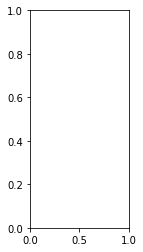

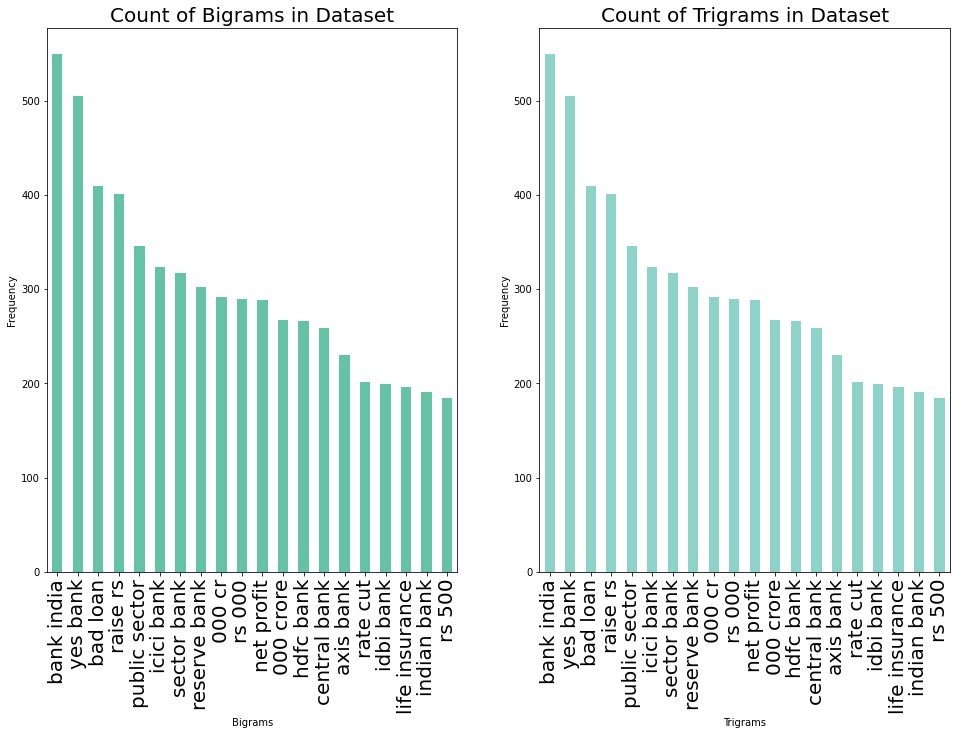

In [50]:
#Subplot-1
plt.subplot(131)
plt.figure(figsize=(25, 10))
total_data_unigram.head(20).plot(kind='bar', figsize=(25, 10), colormap='Set1')
plt.xlabel('Unigrams')
plt.ylabel('Frequency')
plt.title('Count of Unigrams in Dataset', fontsize=20)
plt.xticks(size=20)

#Subplot-2
plt.subplot(132)
total_data_bigram.head(20).plot(kind='bar', figsize=(25, 10), colormap='Set2')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.title('Count of Bigrams in Dataset', fontsize=20)
plt.xticks(size=20)

#Subplot-3
plt.subplot(133)
total_data_bigram.head(20).plot(kind='bar', figsize=(25, 10), colormap='Set3')
plt.xlabel('Trigrams')
plt.ylabel('Frequency')
plt.title('Count of Trigrams in Dataset', fontsize=20)
plt.xticks(size=20)

In [51]:
len(imp_unigrams)

7

**Year-Wise breakdown of the topmost-5 N-grams**

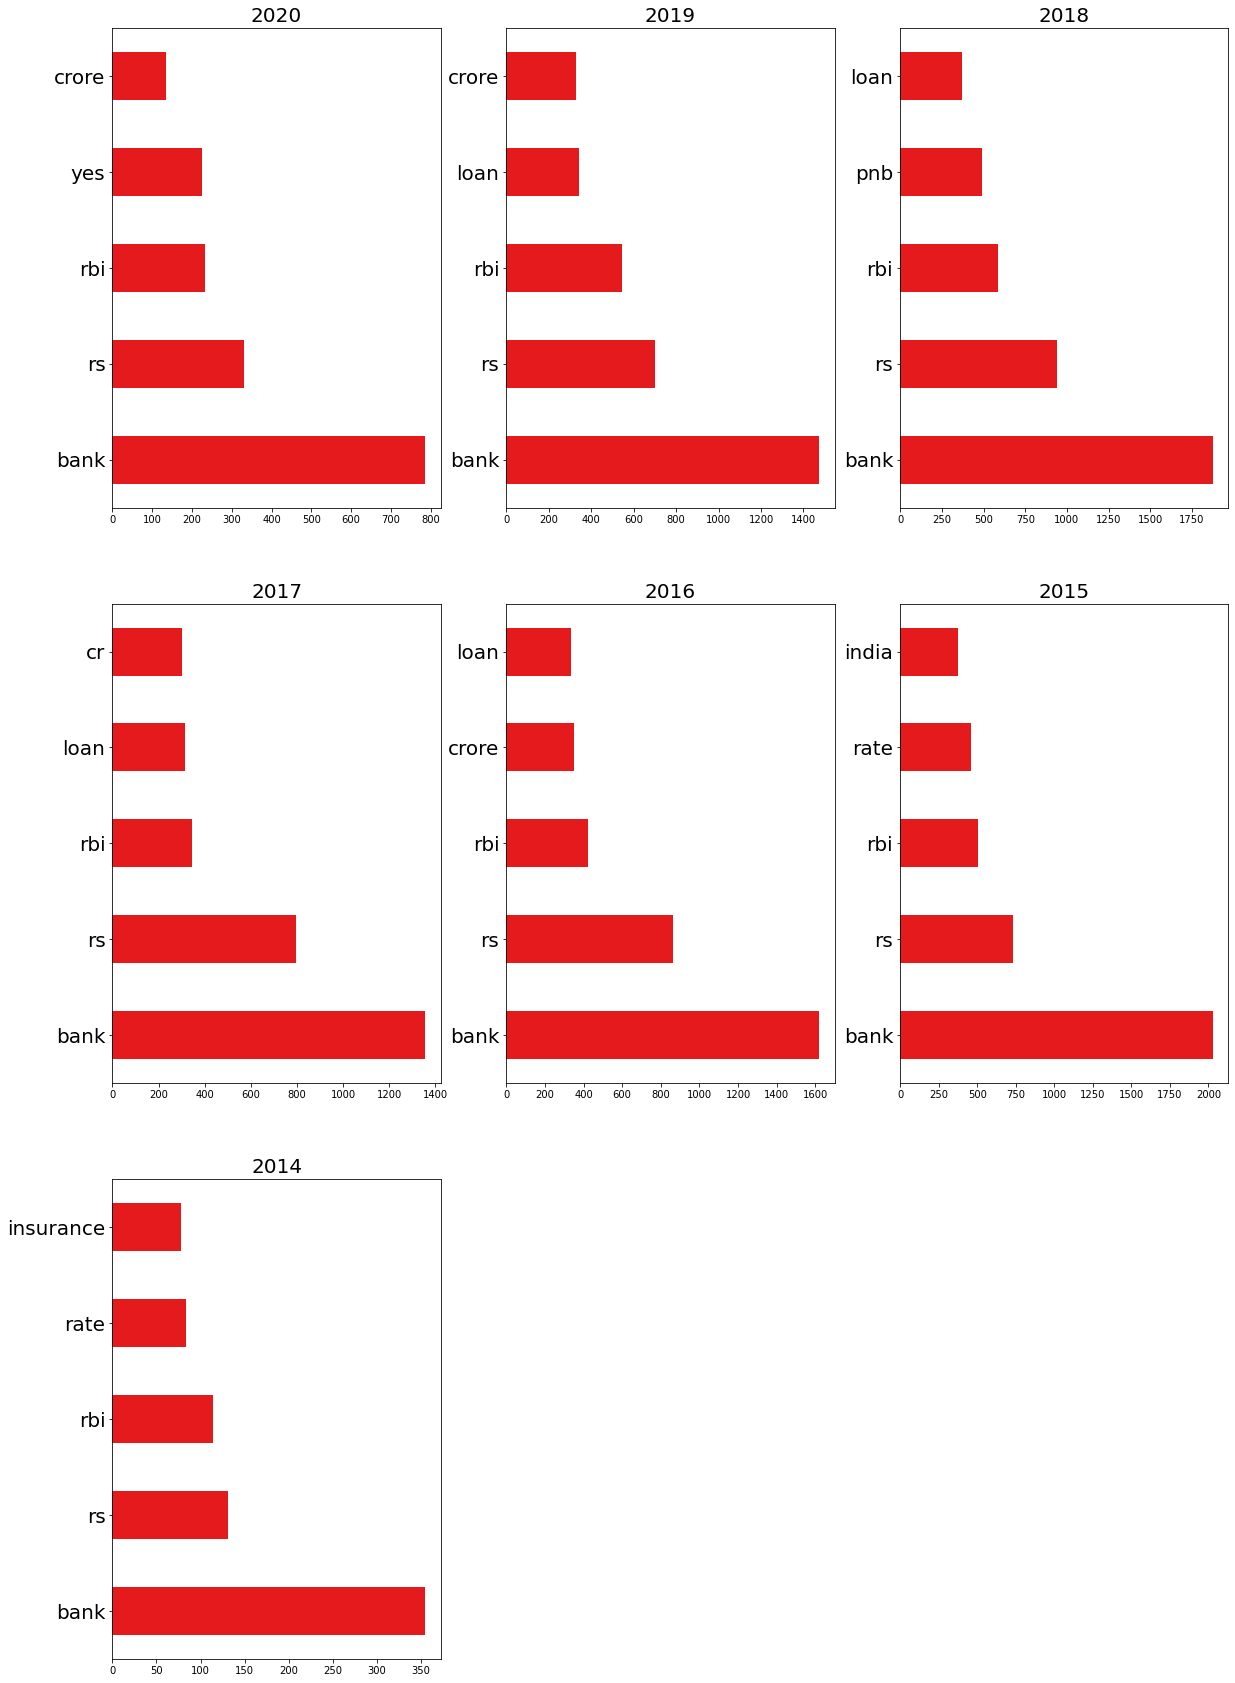

In [52]:
#Unigrams
i=1
for key in imp_unigrams.keys():
  plt.subplot(3, 3, i)
  imp_unigrams[key].head(5).plot(kind='barh', figsize=(20, 30), colormap='Set1')
  plt.yticks(size=20)
  plt.title(key, fontsize=20)
  i = i + 1

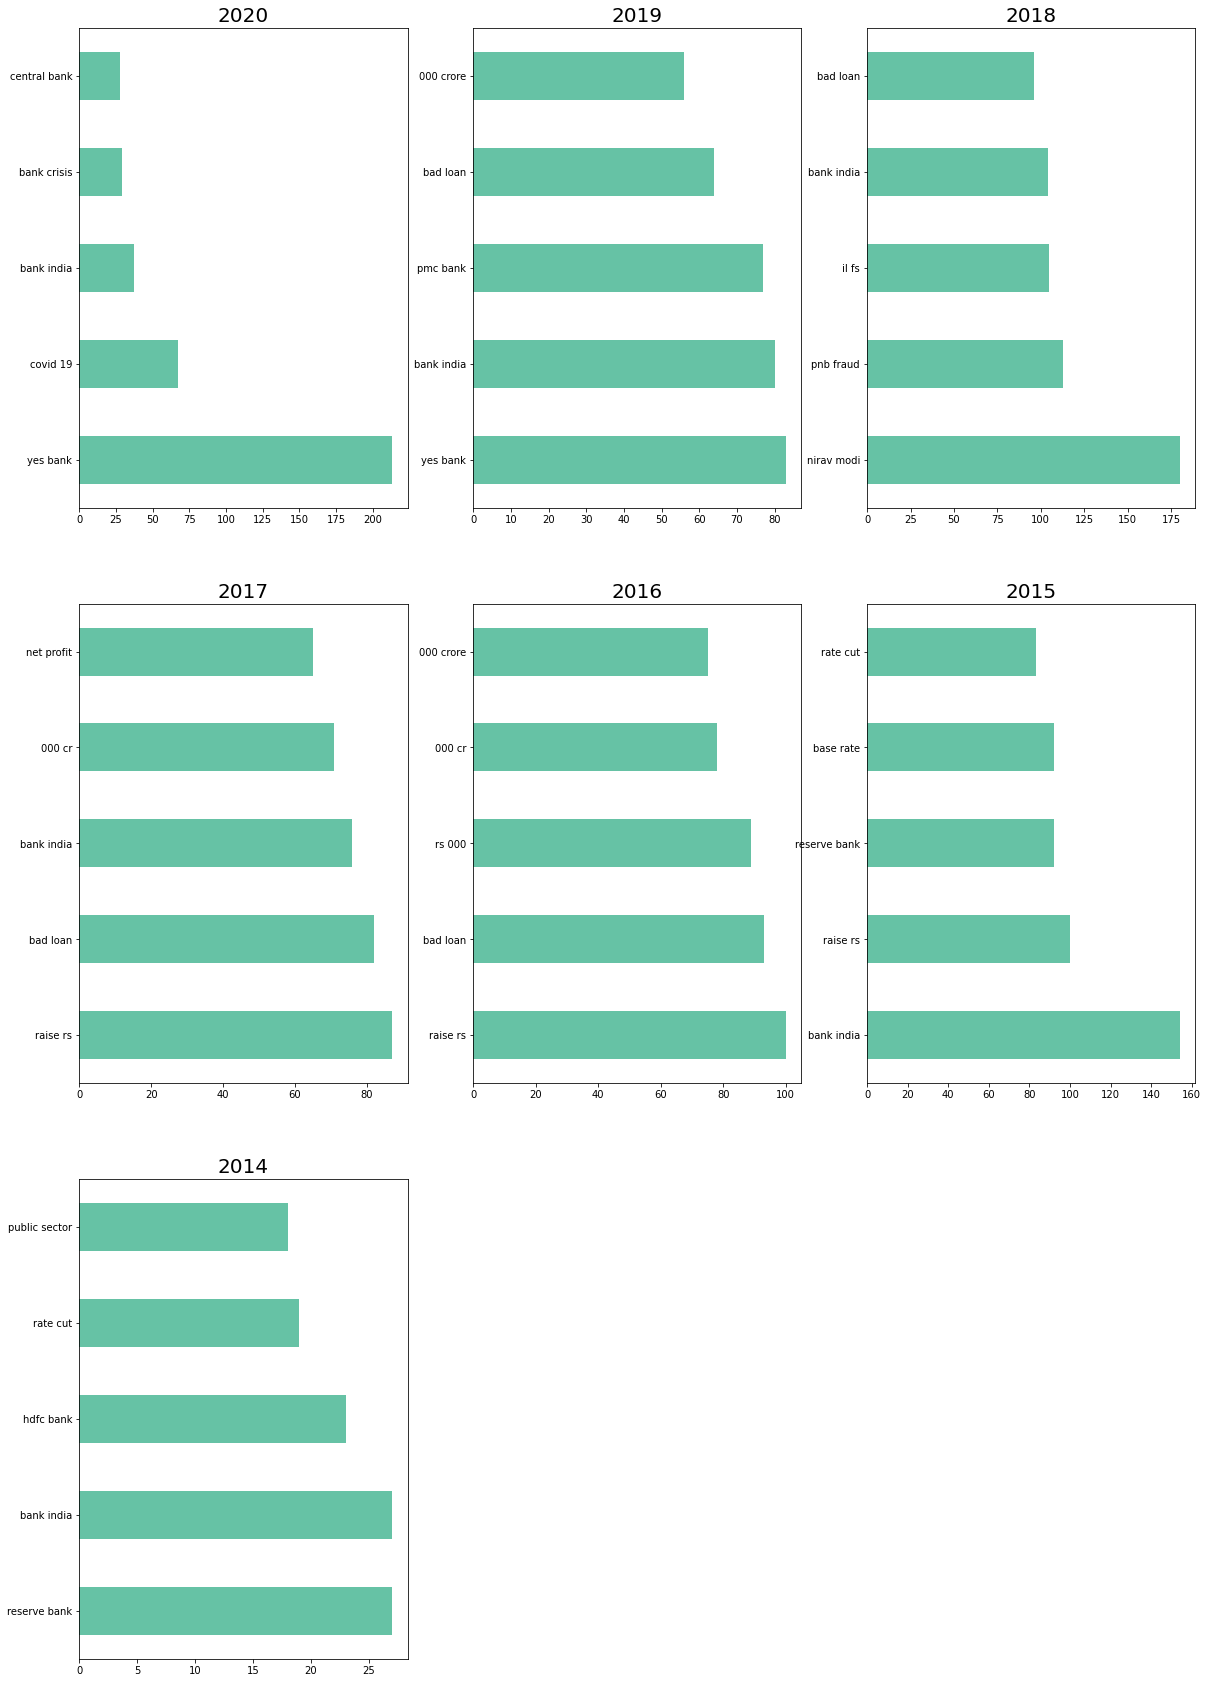

In [53]:
#Bigrams
i=1
for key in imp_bigrams.keys():
  plt.subplot(3, 3, i)
  imp_bigrams[key].head(5).plot(kind='barh', figsize=(20, 30), colormap='Set2')
  plt.title(key, fontsize=20)
  plt.yticks(size=10)
  i = i + 1

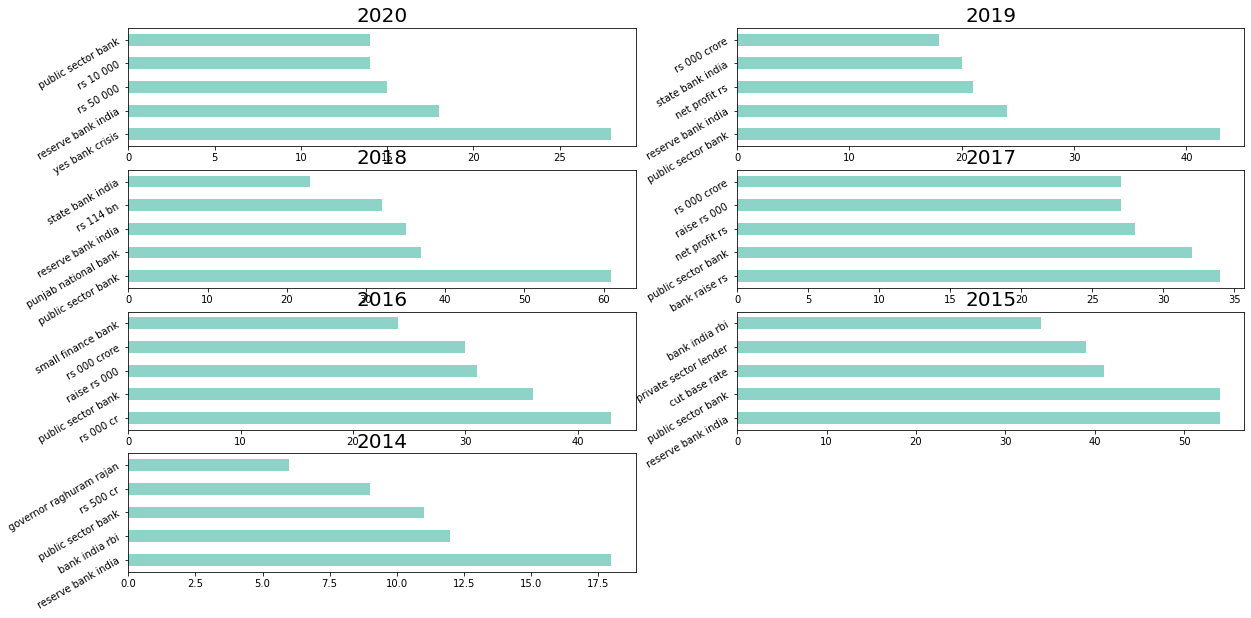

In [54]:
#Trigrams
i=1
for key in imp_trigrams.keys():
  plt.subplot(4, 2, i)
  imp_trigrams[key].head(5).plot(kind='barh', figsize=(20, 10), colormap='Set3')
  plt.title(key, fontsize=20)
  plt.yticks(size=10)
  plt.yticks(rotation=30)
  i = i + 1

**Word-Cloud Visualization**

In [55]:
index_yes = vis_data_sorted['Combined_Text'].str.match(r'(?=.*\byes\b)(?=.*\bbank\b).*$',case=False)
index_RBI = vis_data_sorted['Combined_Text'].str.match(r'.*\bRBI\b.*$',case=False)

In [56]:
#Calculating the polarity of these statements using TextBlob inbuilt sentiment polarity indicator
data_yes = vis_data_sorted.loc[index_yes]
data_RBI = vis_data_sorted.loc[index_RBI]
data_yes['Polarity'] = data_yes['Combined_Text'].apply(lambda row : textblob.TextBlob(row).sentiment.polarity)
data_RBI['Polarity'] = data_RBI['Combined_Text'].apply(lambda row : textblob.TextBlob(row).sentiment.polarity)

In [57]:
# nouns_by_label = vis_data_sorted.groupby('Label_Final')['Title_Noun_Count'].agg(['sum'])
# adverbs_by_label = vis_data_sorted.groupby('Label_Final')['Title_Adverb_Count'].agg(['sum'])
# adjectives_by_label = vis_data_sorted.groupby('Label_Final')['Title_Adjective_Count'].agg(['sum'])

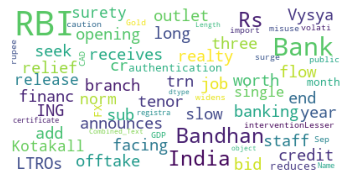

In [58]:
#Some custom functions for generating wordclouds and describing their colours
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = 180
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)


wordcloud = WordCloud(
                  background_color='white',
                  stopwords=STOPWORDS,
                  max_words=200,
                  max_font_size=40, 
                  random_state=42).generate(str(data_RBI['Combined_Text']))

plt.imshow(wordcloud)
plt.figsize=(10, 8)
plt.axis('off')
plt.xticks([])
plt.yticks([])
plt.show()

**Plotting polarity**

**Yes Bank**

In [59]:
data_yes.head()

,Date,Title,Description,Year,Clean_Title,Clean_Desc,Combined_Text,Combined_Tag_Tokens,Title_Noun_Count,Title_Adverb_Count,Title_Adjective_Count,Title_Verb_Count,Jaccard_Index,num_words,num_unique_words,num_chars,num_words_upper,num_words_title,mean_word_len,Polarity
499,2020-03-04,YES Bank in talks with mutual funds for raisin...,If the private bank is able to raise funds in ...,2020,YES Bank talk mutual fund raising 500 million,if private bank able raise fund round would ge...,YES Bank talk mutual fund raising 500 millioni...,"[('YES', 'NNP'), ('Bank', 'NNP'), ('talk', 'VB...",8,0,5,3,0.055556,18,17,108,1,1,5.055556,0.100000
584,2020-02-12,India Ratings downgrades Yes Bank issuer ratin...,This is the third downgrade of the private sec...,2020,India Ratings downgrade Yes Bank issuer rating...,this third downgrade private sector lender Ind...,India Ratings downgrade Yes Bank issuer rating...,"[('India', 'NNP'), ('Ratings', 'NNP'), ('downg...",14,1,3,2,0.043478,23,22,141,0,7,5.173913,0.000000
589,2020-02-12,Falling deposits are the latest problem for Ye...,The lender issued a statement last month assur...,2020,falling deposit latest problem Yes Bank bad loan,the lender issued statement last month assurin...,falling deposit latest problem Yes Bank bad lo...,"[('falling', 'VBG'), ('deposit', 'NN'), ('late...",11,0,4,5,0.000000,21,21,149,0,2,6.142857,-0.066667
422,2020-03-08,"YES Bank crisis: ED widens probe, searches hom...",Sources said the agency might also register a ...,2020,YES Bank crisis ED widens probe search home Ra...,Sources said agency might also register separa...,YES Bank crisis ED widens probe search home Ra...,"[('YES', 'NNP'), ('Bank', 'NNP'), ('crisis', '...",15,1,2,3,0.142857,23,20,154,2,5,5.739130,0.000000
424,2020-03-07,Yes Bank rescue plan: SBI to own 245 cr shares...,SBI shall not reduce its holding below 26 per ...,2020,Yes Bank rescue plan SBI 245 cr share worth Rs...,SBI shall reduce holding 26 per cent completio...,Yes Bank rescue plan SBI 245 cr share worth Rs...,"[('Yes', 'NNP'), ('Bank', 'NNP'), ('rescue', '...",15,0,1,2,0.041667,25,25,135,1,3,4.440000,0.300000


In [60]:
#Calculating Absolute Polarities
data_yes['Absolute_Polarity'] = data_yes['Polarity'].apply(lambda x : 1 if x > 0 else 0)
data_RBI['Absolute_Polarity'] = data_RBI['Polarity'].apply(lambda x : 1 if x > 0 else 0)

In [61]:
pos_labels_yes = data_yes.query("Absolute_Polarity>0")['Combined_Text']
neg_labels_yes = data_yes.query("Absolute_Polarity==0")['Combined_Text']

Text(0.5, 1.0, 'Frequency of Positive and Negative News about Yes Bank')

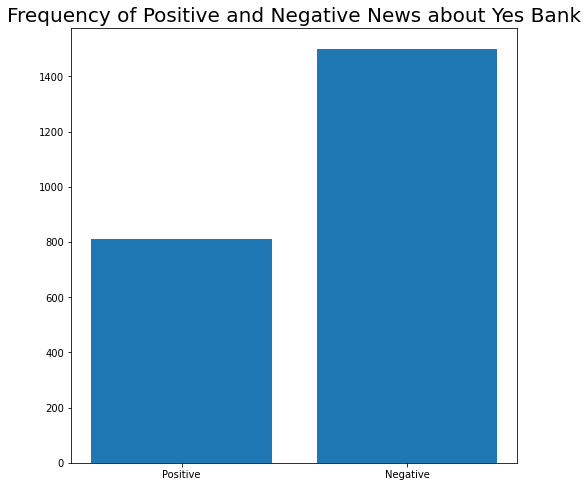

In [64]:
plt.figure(figsize=(8,8))
plt.bar(["Positive","Negative"],[len(pos_labels_yes),len(neg_labels_yes)])
plt.title("Frequency of Positive and Negative News about Yes Bank",fontsize=20)

**RBI** 

In [65]:
pos_labels_RBI = data_RBI.query("Absolute_Polarity>0")['Combined_Text']
neg_labels_RBI = data_RBI.query("Absolute_Polarity==0")['Combined_Text']

Text(0.5, 1.0, 'Frequency of Positive and Negative News about RBI')

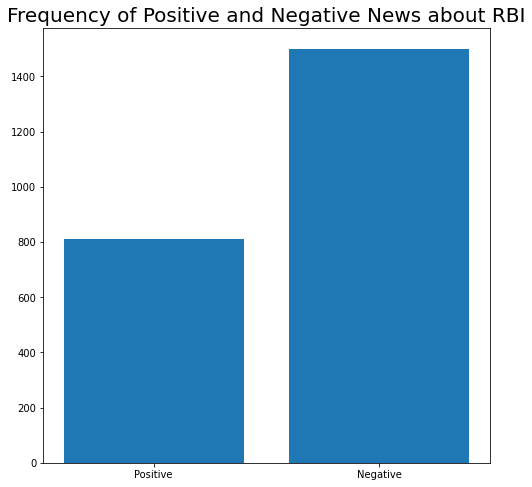

In [66]:
plt.figure(figsize=(8,8))
plt.bar(["Positive","Negative"],[len(pos_labels_RBI),len(neg_labels_RBI)])
plt.title("Frequency of Positive and Negative News about RBI",fontsize=20)

**Plot of frequency of adverb, verbs and relevant POS as used in Turney's algorithm**

In [76]:
vis_turney.head()

,Unnamed: 0,Date,Title,Description,Year,Clean_Title,Clean_Desc,Combined_Text,Combined_Tag_Tokens,Title_Noun_Count,Title_Adverb_Count,Title_Adjective_Count,Title_Verb_Count,Jaccard_Index,num_words,num_unique_words,num_chars,num_words_upper,num_words_title,mean_word_len,Phrases,Positive_Hits,Negative_Hits,Label,Label_Final
0,0,2020-05-26,"ATMs to become virtual bank branches, accept d...","Close to 14.6 per cent (or 35,000) of the 240,...",2020,ATMs become virtual bank branch accept deposit...,close 14 6 per cent 35 000 240 000 ATMs India ...,ATMs become virtual bank branch accept deposit...,"[('ATMs', 'NNP'), ('become', 'VBP'), ('virtual...",10,1,2,2,0.041667,25,23,143,0,1,4.760000,"['virtual bank', 'instant creditclose', 'new a...","[1, 1, 3]","[1, 1, 4]",-0.259200,0
1,1,2020-05-26,IDFC First Bank seniors to forgo 65% of bonus ...,"V Vaidyanathan, managing director and chief ex...",2020,IDFC First Bank senior forgo 65 bonus amid Cov...,V Vaidyanathan managing director chief executi...,IDFC First Bank senior forgo 65 bonus amid Cov...,"[('IDFC', 'NNP'), ('First', 'NNP'), ('Bank', '...",13,0,2,4,0.000000,24,24,156,1,4,5.541667,"['senior forgo', 'managing director', 'directo...","[1, 5, 2, 10, 1]","[1, 11, 4, 8, 1]",-0.483969,0
2,2,2020-05-25,"Huge scam in YES Bank for many years, says Enf...",Rana Kapoor's wife also charged with abetting ...,2020,huge scam YES Bank many year say Enforcement D...,Rana Kapoor wife also charged abetting crime,huge scam YES Bank many year say Enforcement D...,"[('huge', 'JJ'), ('scam', 'NNS'), ('YES', 'NNP...",9,1,2,3,0.000000,15,15,100,1,3,5.733333,"['huge scam', 'many year', 'also charged']","[1, 1, 1]","[1, 2, 1]",-0.454188,0
3,3,2020-05-24,"Bank of Maharashtra sanctioned Rs 2,789 cr in ...",The bank said it was now gearing up to extend ...,2020,Bank Maharashtra sanctioned Rs 2 789 cr loan M...,the bank said gearing extend stimulus package ...,Bank Maharashtra sanctioned Rs 2 789 cr loan M...,"[('Bank', 'NNP'), ('Maharashtra', 'NNP'), ('sa...",16,0,1,3,0.000000,23,23,157,0,7,5.869565,"['bank said', 'gearing extend', 'package annou...","[11, 1, 1]","[11, 1, 1]",-0.120854,0
4,4,2020-05-23,DCB Bank's profit before tax declines 37.6% to...,Net profit for the financial year ended March ...,2020,DCB Bank profit tax decline 37 6 Rs 93 84 cror...,net profit financial year ended March 31 2020 ...,DCB Bank profit tax decline 37 6 Rs 93 84 cror...,"[('DCB', 'NNP'), ('Bank', 'NNP'), ('profit', '...",16,1,1,2,0.160000,30,24,149,2,5,4.000000,"['profit financial', 'financial year']","[1, 22]","[0, 22]",0.000000,1


Text(0.5, 1.0, 'Total Noun Count')

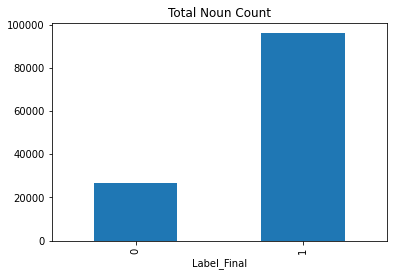

In [79]:
vis_turney.groupby('Label_Final')['Title_Noun_Count'].sum().plot(kind='bar')
plt.title('Total Noun Count')

Text(0.5, 1.0, 'Total Adverb Count')

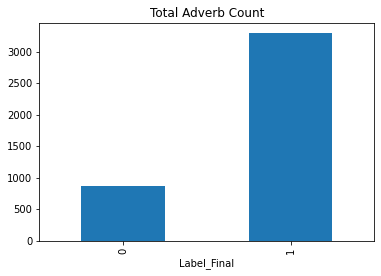

In [80]:
vis_turney.groupby('Label_Final')['Title_Adverb_Count'].sum().plot(kind='bar')
plt.title('Total Adverb Count')

Text(0.5, 1.0, 'Total Adjective Count')

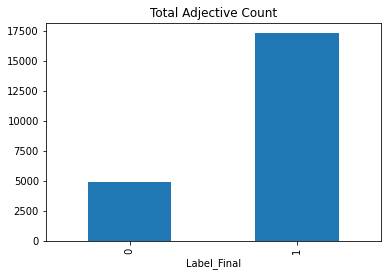

In [81]:
vis_turney.groupby('Label_Final')['Title_Adjective_Count'].sum().plot(kind='bar')
plt.title('Total Adjective Count')

In [67]:
#Saving file to disk
vis_data_sorted.to_csv('/content/drive/MyDrive/Datasets/Indian Financial News Headlines/data/processed/vis_data_sorted.csv')